## Et eksempel på et fit

Udover standard bibliotekerne skal vi også importere curve_fit fra scipy.optimize:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=18)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, top=True, direction="in")  # skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

For at fitte skal vi have:  $x$-værdier, de tilførende $y$-værdier, fitfunktionen (i dette eksempel: $\textit{funlin}$) der kan afhænge af flere parametre $(a,b,...)$, samt usikkerhederne på $y$-værdierne.

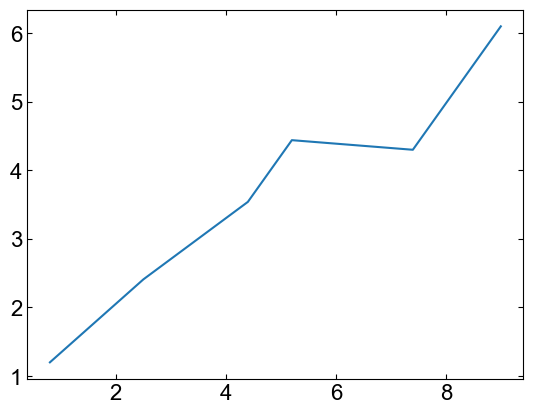

In [16]:
def funlin(x, a, b):
    return a*x + b
xlin = np.array([0.8, 2.5, 4.4, 5.2, 7.4, 9.0])
ylin = np.array([1.20, 2.41, 3.54, 4.44, 4.30, 6.10])
yler = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
plt.plot(xlin,ylin)

For at fit-programmet virker godt skal man normalt finde gode start-gæt til parametrene. Start derfor med at plotte dataene, gæt nogle parameterværdier (her i $\textit{pinit1}$) og plot dem eventuelt for at se om du forstår hvad parametrene gør ved fitkurven...

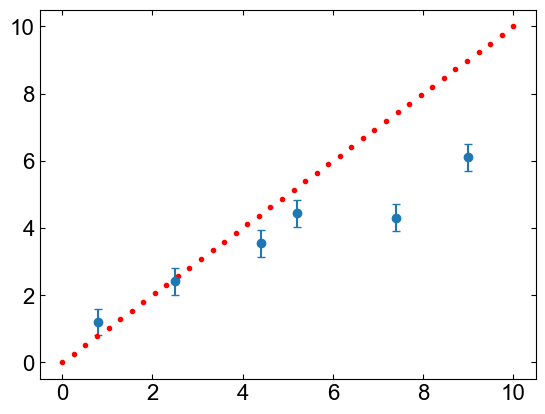

In [13]:
plt.errorbar(xlin, ylin, yler, fmt='o', ms=6, capsize=3)

pinit1 = np.array([1., 0.])
xhelp1 = np.linspace(0.,10.,40)
yhelp1 = funlin(xhelp1, pinit1[0], pinit1[1])
plt.plot(xhelp1, yhelp1, 'r.')

Når man er tilfreds med start parametrene kan man køre fittet. Her udskriver vi værdierne af de fittede parametre, deres usikkerheder, og værdien af $\chi^2$ i minimum (som vi skal snakke om senere, kan den give et mål for hvor godt fittet er - den sidste parameter er et sandsynlighedsmål for dette):

In [9]:
popt, pcov = curve_fit(funlin, xlin, ylin, p0=pinit1, sigma=yler, absolute_sigma=True)
print('a (hældning):',popt[0],'    b (intercept):',popt[1])
perr = np.sqrt(np.diag(pcov))
print('usikkerheder:',perr)
chmin = np.sum(((ylin-funlin(xlin, *popt))/yler)**2)
print('chi2:',chmin,' ---> p:', ss.chi2.cdf(chmin,4))

a (hældning): 0.543515463097207     b (intercept): 1.0108328152972368
usikkerheder: [0.05899709 0.33116417]
chi2: 6.378049381820824  ---> p: 0.827361722466458


og kan som check plotte fittet ovenpå dataene.

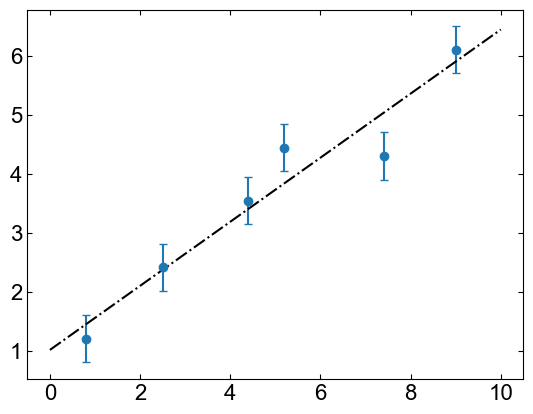

In [10]:
plt.errorbar(xlin, ylin, yler, fmt="o", ms=6, capsize= 3)
plt.plot(xhelp1, funlin(xhelp1, *popt), 'k-.')

## Input og output

En kort oversigt over input og output til curve_fit i de normale situationer. De mere komplicerede situationer er dækket i de næste afsnit, men i langt de fleste tilfælde vil I kunne nøjes med informationen i dette afsnit.

Et standard kald til curve_fit vil se sådan ud:
$$ popt, pcov = curve\_fit(func, xdata, ydata, p0=pinit, sigma=yerr, absolute\_sigma=True)  $$
Curve_fit finder et minimum for mindste kvadraters udtrykket
$$ \chi^2 = \sum_i \left( \frac{ydata_i-func(xdata_i,p)}{yerr_i} \right)^2  =
   \sum_i \left( \frac{y_i-func(x_i,p)}{\sigma_i} \right)^2 $$

$\textbf{Input}$: et par ord til hver overstående parameter

$func$ - funktionen der beskriver hvordan $y$ afhænger af $x$ og som kan have parametre samlet i en array $p$. Den skal være defineret med $x$ som første argument og $p$ (eller listen af parametre) som de følgende argumenter.

$xdata$ - værdierne for $x$, den uafhængige variabel. Normalt blot en array, men der kan i princippet (i komplekse tilfælde) være flere målte variable til hver $y$-værdi, og $xdata$ skal i de tilfælde være en 2 dimensionel array.

$ydata$ - værdierne for $y$, den afhængige variabel. En array.

$p0$ - start-værdier for parametrene $p$ når curve_fit går i gang med at finde minimum. Hvis man ikke selv skriver dem ind bliver de alle sat til 1, hvilket går fint i simple tilfælde, men i komplekse (multi-dimensionelle) tilfælde kan gøre det umuligt i praksis at finde det globale minimum.

$sigma$ - usikkerhederne på $y$-værdierne. Hvis den ikke opgives antager programmet at alle usikkerheder er 1, dvs det laver et uvægtet fit.

$absolute\_sigma$ - skal altid være 'True' i et seriøst fit. Hvis den ikke opgives antager programmet den er 'False'. I så fald skaleres alle parameter-usikkerheder (med notation fra kapitel 8: kovariansmatricen ganges med $\chi^2_{min}$/dof), usikkerhederne på $y$ giver så kun en relativ vægtning af de enkelte punkter.

$\textbf{Output}$: array $popt$ indeholder de fittede værdier for parametrene i func, dvs dem der giver minimum for $\chi^2$. 

Matricen (den 2-dimensionale array) $pcov$ indeholder kovarians-matricen for $popt$, dvs informationen om usikkerheder og korrelationer på parametrene. I vil ofte i starten nøjes med at se på diagonalen, som indeholder variansen af hver af parametrene, og vi skrev netop $\sqrt{diag(pcov)}$ ud ovenfor for at få usikkerhederne.

## Mere avancerede fit

Der er en hel del flere muligheder i curve_fit, så kig den officielle dokumentation igennem når I kommer udover standard-situationerne. Man kan for eksempel lade $sigma$ være en to-dimensionel array (en kovarians matrice), hvis der er korrelationer mellem de forskellige $y$-punkter. Nogle få andre argumenter:

$bounds = (pmin,pmax)$ - man kan begænse de områder parameterne kan bevæge sig indenfor via to arrays $pmin$ og $pmax$. Hvis man indsætter en skalar i stedet for en array bruges samme grænser for alle parametre. Skal man kun have grænser på nogle parametre eller kun en øvre/nedre grænse sættes de andre til plus eller minus uendelig (med $\texttt{np.inf}$).

$loss = 'huber'$ - (der er flere andre muligheder, som kan findes via dokumentationen for $least\_squares$). Bruges når man vil erstatte et standard fit med et mere robust fit. Kræver at man først sætter sig ind i hvad et robust fit er...

## Når curve_fit ikke rækker

Curve_fit laver kun mindste kvadraters minimering, så man skal finde andre metoder for at udføre maximum likelihood fit. I princippet kan scipy.stats lave maximum likelihood fits for alle fordelinger (med "method" fit, f.eks. $\texttt{scipy.stats.norm.fit}$), men her får man kun parametre ud, ikke usikkerheder - og mere komplekse fit-funktioner skal man selv skrive. Gøres det kan man minimere med f.eks. $\texttt{scipy.optimize.minimize}$ og skal så finde usikkerheder via brug af $\texttt{scipy.optimize.OptimizeResult}$.

Mit gæt er at det vil tage flere år før I får brug for andet end mindste kvadraters metoden med curve_fit. Når I når til det punkt, vil jeg anbefale at I i stedet downloader og bruger $\texttt{iminuit}$ pakken - den er heller ikke umiddelbar nem at gå i gang med, men er grundigt gennemtestet gennem mange år (skrevet og brugt på CERN i årtier) og giver mere flexibilitet i fits. Som et eksempel kan man fiksere parametre undervejs og frigive dem senere, hvilket kan være en hjælp når der er mange frie fit-parametre. Minuit (som pakken hedder på andre programmeringssprog) er efter min erfaring uomgængelig når man skal lave seriøs opgradering af sine fit.